
# Week 08 Final Exam Assignment  
## Dataset: IBM HR Analytics Employee Attrition & Performa   || Employee Attrition Prediction
## [Dataset Link](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)

**Student name:**  Injam Ul Haque <br>
*Phitron AI/ML Batch-01*\
*Email: inlatan22@gmail.com*\
*Module - 29 || ML Final Exam Assignment*


# Imports

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier, StackingClassifier



from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder




from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV



from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


import pickle


# For ML Flow Import
!pip install mlflow
import mlflow
import mlflow.sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier




import warnings
warnings.filterwarnings("ignore")




# 1. Data Loading (5 Marks)
Load the chosen dataset into your environment and display the first few rows along with the shape to verify correctness.



In [84]:
# ======================== Load the dataset ======================

# Stored the dataset from my personal google drive and make it public for the tasks
file_link = "https://drive.google.com/file/d/1O0-B52ueUlnCVpXPhjrT3UrWw4BY3iMY/view?usp=drive_link"

# get the id part of the file
id = file_link.split("/")[-2]

# creating a new link using the id so that we can easily read the csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'

try:
  df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")   # Local Environment - Download the .csv file from Kaggle

except:
  #load the dataset from my google drive uploaded , If the upper one fails
  df = pd.read_csv(new_link)


# ================Display first 15 rows with shape ==================
print(df.head(15))


print("="*80)
print(df.shape)
print("="*80)

print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")


print("="*80)
print("\nDescribe (numeric columns):")
print("\n" + "="*80)

display(df.describe().T)

    Age Attrition     BusinessTravel  DailyRate              Department  \
0    41       Yes      Travel_Rarely       1102                   Sales   
1    49        No  Travel_Frequently        279  Research & Development   
2    37       Yes      Travel_Rarely       1373  Research & Development   
3    33        No  Travel_Frequently       1392  Research & Development   
4    27        No      Travel_Rarely        591  Research & Development   
5    32        No  Travel_Frequently       1005  Research & Development   
6    59        No      Travel_Rarely       1324  Research & Development   
7    30        No      Travel_Rarely       1358  Research & Development   
8    38        No  Travel_Frequently        216  Research & Development   
9    36        No      Travel_Rarely       1299  Research & Development   
10   35        No      Travel_Rarely        809  Research & Development   
11   29        No      Travel_Rarely        153  Research & Development   
12   31        No      Tr

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


# 2. Data Preprocessing (10 Marks)
Perform and document at least 5 distinct preprocessing steps (e.g., handling missing values, encoding, scaling, outlier detection, feature engineering).


In [85]:
# Data Preprocessing

# ============= Handling Missing Values =============
print("="*80)
print("Missing Values")
print("\n" + "="*80)

missing = df.isnull().sum()
print(missing)         # No Missing Value Found Here



# ============= Finding Unique Values =============
print("="*80)
print("Unique Values")
print("\n" + "="*80)

print(df.nunique())


Missing Values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole      

In [86]:
# ============= Drop Columns =============

# EmployeeCount, Over18, StandardHours theres only one unique value and it was same for everyone so that's not needed, dropping this columns

cols_to_drop = ['EmployeeCount', 'Over18', 'StandardHours']

df = df.drop(columns=cols_to_drop)
# print(df.shape)



# ===================== Encoding Categorical Target Variables================

le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])
print("Target variable encoded:")
print(df['Attrition'].value_counts())


Target variable encoded:
Attrition
0    1233
1     237
Name: count, dtype: int64


In [87]:
# Separate X and y
X = df.drop('Attrition',axis=1)
y = df['Attrition']

# one Hot Label Encoding needed in --> BusinessTravel, Department, EducationField, JobRole , MaritalStatus
# Label Encoding --> Attrition, Gender, OverTime


# Numerical Column and Categorical Columns
numeric_features = X.select_dtypes(include = ['int64','float64']).columns
categorical_features = X.select_dtypes(include = ['object']).columns

print("Numeric features:", len(numeric_features))
print("Categorical features:", len(categorical_features))


# ============ Check correlation for numerical features ==============
corr_target = df.select_dtypes(include=np.number).corr()['Attrition'].sort_values(ascending=False)
print("Correlation with Attrition:")
print(corr_target)



Numeric features: 24
Categorical features: 7
Correlation with Attrition:
Attrition                   1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Na

# 3. Pipeline Creation (10 Marks)
Construct a standard Machine Learning pipeline that integrates preprocessing and the model


In [88]:
# ======================== PIPELINE CREATION ==================


#for Numerical features
num_transformer = Pipeline (
    steps = [
        ('imputer', SimpleImputer(strategy= 'median')),
        ('scaler', StandardScaler())
    ]
)


# split
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state=42)

#combine them
preprocessor = ColumnTransformer(
    transformers= [
        ('num',num_transformer, numeric_features),
        ('cat',cat_transformer, categorical_features)
    ]
    )



# For categorical feature
cat_transformer = Pipeline( steps = [
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
] )

# 4. Primary Model Selection (5 Marks)
Choose a suitable algorithm and justify why this specific model was selected for the dataset.


**Selected Model: RANDOM FOREST CLASSIFIER**\
**JUSTIFICATION:**
1. Handles both numeric and categorical features effectively.
2. Robust to outliers and does not require normality assumptions.
3. Provides feature importance for interpretation.
4. Reduces overfitting through ensemble learning.
5. No feature scaling required (tree-based).
6. Excellent performance for binary classification tasks.
7. Can capture non-linear relationships.

In [89]:
#========================== Primary Model Selection====================

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

# ML pipeline=
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

print("ML Pipeline Created --> Preprocessing + Random Forest")


ML Pipeline Created --> Preprocessing + Random Forest


# 5. Model Training (10 Marks)
Train your selected model using the training portion of your dataset.


In [90]:
# Ensemble - boosting, stacking

#base learner
clf_lr = LogisticRegression(max_iter=1000, random_state=42)
clf_rf = RandomForestClassifier( n_estimators=100, random_state=42 )
clf_gb = GradientBoostingClassifier( n_estimators=100 , random_state=42 )


#Voting Classifier
voting_clf = VotingClassifier(
    estimators= [
        ('lr', clf_lr),
        ('rf',clf_rf),
        ('gb', clf_gb)
    ]
)


#stacking
stacking_clf = StackingClassifier(
    estimators= [
        ('rf',clf_rf),
        ('gb', clf_gb)
    ],
    final_estimator= LogisticRegression(max_iter=1000) # the meta learner that shows on project week
)


# dictionary of all model
model_to_train = {
    'Logistic Regression' : clf_lr,
    'Random Forest' : clf_rf,
    'Gradient Boosting': clf_gb,
    'Voting Ensemble ' : voting_clf,
    'Stacking Ensemble ' : stacking_clf

}


# Training & Evaluation
result = []

# Creating full pipeline with preprocessor
for name , model in model_to_train.items():
  pipe = Pipeline(
      [
          ('preprocessor', preprocessor),
          ('model',model)
      ]
  )


  pipe.fit(X_train,y_train)            # train

  y_pred = pipe.predict(X_test)     #predict

  accuracy = accuracy_score(y_test,y_pred)   # Evaluate

  result.append({
      "Model": name,
      "Accuracy" :accuracy
  })

results_df = pd.DataFrame(result).sort_values("Accuracy", ascending=False)

print(results_df)

                 Model  Accuracy
0  Logistic Regression  0.894558
3     Voting Ensemble   0.884354
2    Gradient Boosting  0.880952
4   Stacking Ensemble   0.877551
1        Random Forest  0.874150


# 6. Cross-Validation (10 Marks)
Apply Cross-Validation  to assess robustness and report the average score with standard deviation.


In [91]:
rf_pipeline = Pipeline(
    [
        ('preprocessor',preprocessor),
        ('model',RandomForestClassifier(n_estimators=100,random_state=42))
     ]
  )

# ============ 5 fold crpss validation ===============
cv_scores = cross_val_score( rf_pipeline,X_train,y_train,cv=5, scoring='accuracy' )

print("Cross-Validation Scores:", cv_scores)
print(f"\nAverage CV Score: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


Cross-Validation Scores: [0.84745763 0.88085106 0.84255319 0.86382979 0.85957447]

Average CV Score: 0.8589
Standard Deviation: 0.0135


# 7. Hyperparameter Tuning (10 Marks)
Optimize your model using search methods displaying both the parameters tested and the best results found.


In [92]:
from sklearn.model_selection import GridSearchCV

rf_pipeline = Pipeline(
    [
        ('preprocessor',preprocessor),
        ('model',RandomForestClassifier(random_state=42))
     ]
  )



# Define the grid
param_grid = {
    'model__n_estimators' : [100,200] ,
    'model__max_depth': [None,10,20],
    'model__min_samples_split' : [2,5]
}

grid_search = GridSearchCV(
    estimator = rf_pipeline,
    param_grid = param_grid,
    cv = 5 ,
    scoring = 'accuracy',
    n_jobs =-1,
    verbose = 2

)


grid_search.fit(X_train,y_train)

print("Best Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Score: 0.860544536602957
Best Parameters: {'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_estimators': 200}


# 8. Best Model Selection (10 Marks)
Select  the final best-performing model based on the hyperparameter tuning results.


In [93]:
# Extract the best model using GridSearchCV

best_rf = grid_search.best_estimator_
# print("Best Parameters:", grid_search.best_params_)

print("="*80)
print("Best Cross-Validation Score:")
print("="*80)
print(f"{grid_search.best_score_:.4f}")

# Assign to best_model
best_model = best_rf

Best Cross-Validation Score:
0.8605


# 9. Model Performance Evaluation (10 Marks)
Evaluate the model on the test set and print comprehensive metrics suitable for the problem type.


Model Performance on Test Set:
Accuracy: 0.8741

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294


Confusion Matrix:
[[253   2]
 [ 35   4]]


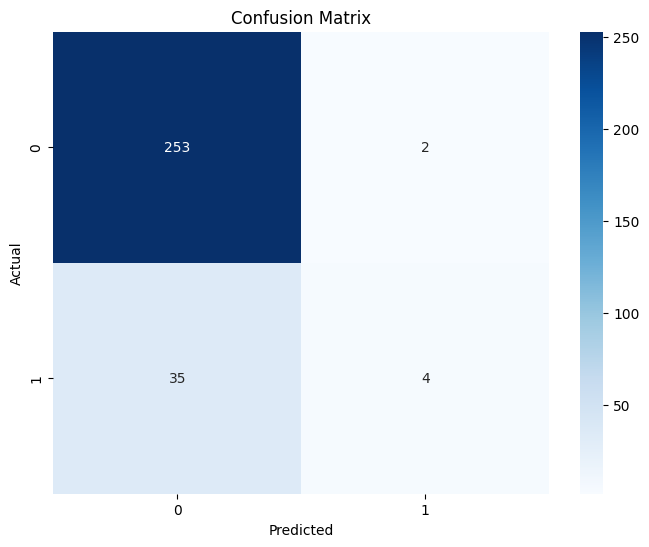

In [94]:
# ======== Evaluate the Model on test Set ===============

# Predict on test set
y_pred = best_model.predict(X_test)


#Calculate metrics
accuracy = accuracy_score(y_test, y_pred)

print("Model Performance on Test Set:")
print("="*50)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



# =========== Visualization of Confusion Matrix ================
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# ML Flow
Just tried the concept which was shown on last project week

In [95]:
# Ml flow import --> upper

# Test Run - Discover MLflow
mlflow.set_tracking_uri("file:///content/mlruns")
mlflow.set_experiment("test_run")

with mlflow.start_run( run_name = "Dummy_test" ):
  #metric
  mlflow.log_metric( "Accuracy", 0.85 )
  mlflow.log_metric( "Precision", 0.83 )
  #parameter
  mlflow.log_param("model_type","fake_classifier_v1")
  mlflow.log_param("Learning Rate",0.001)

print("Test run completed\n")



# ============================================
# Random Forest using MLflow - Employee Attrition
# ============================================
mlflow.set_experiment("Employee Attrition Prediction using RF")

my_params = {
    'n_estimators' :100,
    'max_depth' :10,
    'random_state' : 42
}

simple_rf_pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',RandomForestClassifier(**my_params))
])

# Start MLflow tracking
with mlflow.start_run( run_name = "Single_RF_Classifier"):

  mlflow.log_params(my_params)
  mlflow.log_param("model_type","RandomForestClassifier")

  # Train
  simple_rf_pipeline.fit(X_train,y_train)

  y_train_pred = simple_rf_pipeline.predict(X_train)
  train_accuracy = accuracy_score(y_train,y_train_pred)
  train_precision = precision_score(y_train,y_train_pred)
  train_recall = recall_score(y_train,y_train_pred)
  train_f1 = f1_score(y_train,y_train_pred)

  # Log train metrics
  mlflow.log_metric("train_accuracy",train_accuracy)
  mlflow.log_metric("train_precision",train_precision)
  mlflow.log_metric("train_recall",train_recall)
  mlflow.log_metric("train_f1_score",train_f1)

  # Test
  y_test_pred = simple_rf_pipeline.predict(X_test)
  test_accuracy = accuracy_score(y_test,y_test_pred)
  test_precision = precision_score(y_test,y_test_pred)
  test_recall = recall_score(y_test,y_test_pred)
  test_f1 = f1_score(y_test,y_test_pred)

  # Log test metrics
  mlflow.log_metric("test_accuracy",test_accuracy)
  mlflow.log_metric("test_precision",test_precision)
  mlflow.log_metric("test_recall",test_recall)
  mlflow.log_metric("test_f1_score",test_f1)

  # Display results
  print("MLflow Tracking Results")
  print(f"Train Accuracy: {train_accuracy:.4f}")
  print(f"Test Accuracy: {test_accuracy:.4f}")
  print(f"Test Precision: {test_precision:.4f}")
  print(f"Test Recall: {test_recall:.4f}")
  print(f"Test F1 Score: {test_f1:.4f}")
  print("="*50)

Test run completed

MLflow Tracking Results
Train Accuracy: 0.9787
Test Accuracy: 0.8707
Test Precision: 0.5714
Test Recall: 0.1026
Test F1 Score: 0.1739


# 10. Web Interface with Gradio (10 Marks)
Create a user-friendly Gradio web interface that takes user inputs and displays the prediction from your trained model.


In [96]:
# Save the Model on Google Collab

filename = "attrition_rf_model_pipeline.pkl"

with open( filename, "wb" ) as file:
  pickle.dump( best_model, file )

[GitHub Link For Gradio Web Interface and Prediction Models pkl File](https://)

# 11. Deployment to Hugging Face (10 Marks)
Deploy the Gradio app to Hugging Face Spaces and ensure it is accessible via a public URL.


[GitHub Repository Link](https://)

[Hugging Face Deployed Link](https://)


---

| Authors |
| --- |
| [Injam Ul Haque](https://www.linkedin.com/in/injamtanvir/?originalSubdomain=bd) |

